## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

###1. Import and set and Tensorflow 2 and verify version

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

In [184]:
tf.__version__

'2.1.0-rc1'

### 2. Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train_f), (x_test, y_test_f) = fashion_mnist.load_data()

###3. Create a list 'class_names' of below Class Names
**Class - Class Name** ==> 
0 - T-shirt, 
1 - Trouser, 
2 - Pullover, 
3 - Dress, 
4 - Coat, 
5 - Sandal, 
6 - Shirt, 
7 - Sneaker, 
8 - Bag, 
9 - Ankle boot,

In [0]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

###4. Find no.of samples in training and test dataset

In [187]:
x_train.shape

(60000, 28, 28)

In [188]:
x_test.shape

(10000, 28, 28)

###5. Find dimensions of an image in the dataset

In [189]:
x_train[0].shape

(28, 28)

### 6. Verify if existing labels/Classes are correct 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

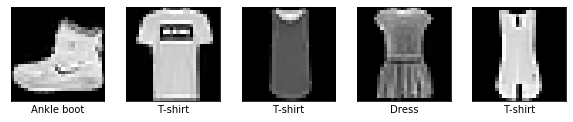

In [191]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train_f[i]])
plt.show()

### 7. Convert train and test labels to one hot vectors

** check `tensorflow.keras.utils.to_categorical()` **

In [0]:
y_train = tf.keras.utils.to_categorical(y_train_f, dtype='float32')

In [0]:
y_test = tf.keras.utils.to_categorical(y_test_f, dtype='float32')

###8. Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train_norm = x_train/255
x_test_norm = x_test/255

In [195]:
x_test_norm.shape

(10000, 28, 28)

###9. Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras
check `tensorflow.keras.backend.expand_dims`


In [0]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

###10. Import the necessary layers from keras to build the model

In [0]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape


### 11. Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with no.of `epochs=10`. **

In [0]:
#Add first convolutional layer
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))

#Add second convolutional layer
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

###12. Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
#Add MaxPooling layer
model.add(MaxPool2D(pool_size=(2,2)))

In [0]:
#Flatten the output
model.add(Flatten())

In [0]:
#Dense layer
model.add(Dense(128, activation='relu'))

#Output layer
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [203]:
#Train the model
model.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=10, batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.3603 - accuracy: 0.8712 - val_loss: 0.2839 - val_accuracy: 0.8964
Epoch 2/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.2254 - accuracy: 0.9162 - val_loss: 0.2383 - val_accuracy: 0.9112
Epoch 3/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.1686 - accuracy: 0.9371 - val_loss: 0.2506 - val_accuracy: 0.9074
Epoch 4/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.1266 - accuracy: 0.9527 - val_loss: 0.2461 - val_accuracy: 0.9177
Epoch 5/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0921 - accuracy: 0.9655 - val_loss: 0.2725 - val_accuracy: 0.9188
Epoch 6/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0666 - accuracy: 0.9751 - val_loss: 0.3056 - val_accuracy: 0.9201
Epoch 7/10
60000/60000 [==========================

In [0]:
tf.keras.backend.clear_session()
model1 = Sequential()
model1.add(Reshape((28,28,1),input_shape=(28,28,)))
model1.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model1.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
#Add another dropout layer
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(10, activation='softmax'))

In [0]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [206]:
model1.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=10, batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.3732 - accuracy: 0.8652 - val_loss: 0.2826 - val_accuracy: 0.8978
Epoch 2/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.2397 - accuracy: 0.9120 - val_loss: 0.2485 - val_accuracy: 0.9075
Epoch 3/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.1923 - accuracy: 0.9281 - val_loss: 0.2243 - val_accuracy: 0.9192
Epoch 4/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.1546 - accuracy: 0.9415 - val_loss: 0.2193 - val_accuracy: 0.9229
Epoch 5/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.1268 - accuracy: 0.9520 - val_loss: 0.2199 - val_accuracy: 0.9236
Epoch 6/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.1035 - accuracy: 0.9613 - val_loss: 0.2321 - val_accuracy: 0.9256
Epoch 7/10
60000/60000 [==========================

###13. Verify accuracy of the model

> 

In [207]:
model.evaluate(x_test_norm, y_test, verbose=3)

[0.46541616255789997, 0.9227]

In [208]:
model1.evaluate(x_test_norm, y_test, verbose=3)

[0.3141710009098053, 0.9245]

####14. Verify performance of your model selectively 

In [0]:
predictions = model1.predict(x_train_norm)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color="blue")

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(9), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='blue')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

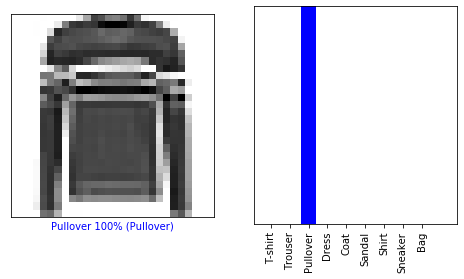

In [210]:
#Replace value of i with other index to check other product
i = 5
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_train_f, x_train)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_train_f)
plt.show()

### Now, to the above model, lets add Data Augmentation 

###15. Import the ImageDataGenrator from keras and fit the training images

In [0]:
x_train_reshaped = tf.keras.backend.expand_dims(x_train_norm, axis = -1)

In [0]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True)

In [0]:
datagen.fit(x_train_reshaped)

####16. Showing 5 versions of the first image in training dataset using image datagenerator.flow()

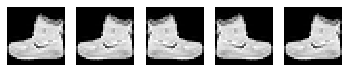

In [215]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_reshaped[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()